Download Data from https://www.kaggle.com/datasets/kabilan03/dogbreedclassification

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import tensorflow as tf
print('TF Version: ', tf.__version__)
import tensorflow_hub as hub
print('Hub Version: ', hub.__version__)

# Check for GPU availability:
print('GPU', 'available(YES!)' if tf.config.list_physical_devices('GPU') else 'not available')

TF Version:  2.13.0
Hub Version:  0.14.0
GPU available(YES!)


In [6]:
#!unzip 'drive/MyDrive/Dog VIsion/dog-breed-identification.zip'

In [7]:
#!unzip "drive/MyDrive/D_V/dog-breed-identification.zip" -d 'drive/MyDrive/DogVision'

In [8]:
# Turning our images into tensors:
# Let's start by accessing our data and checking out the labels
import pandas as pd
labels = pd.read_csv('drive/MyDrive/DogVision/labels.csv')
print(labels.describe())
print(labels.head)

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
<bound method NDFrame.head of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220

<Axes: >

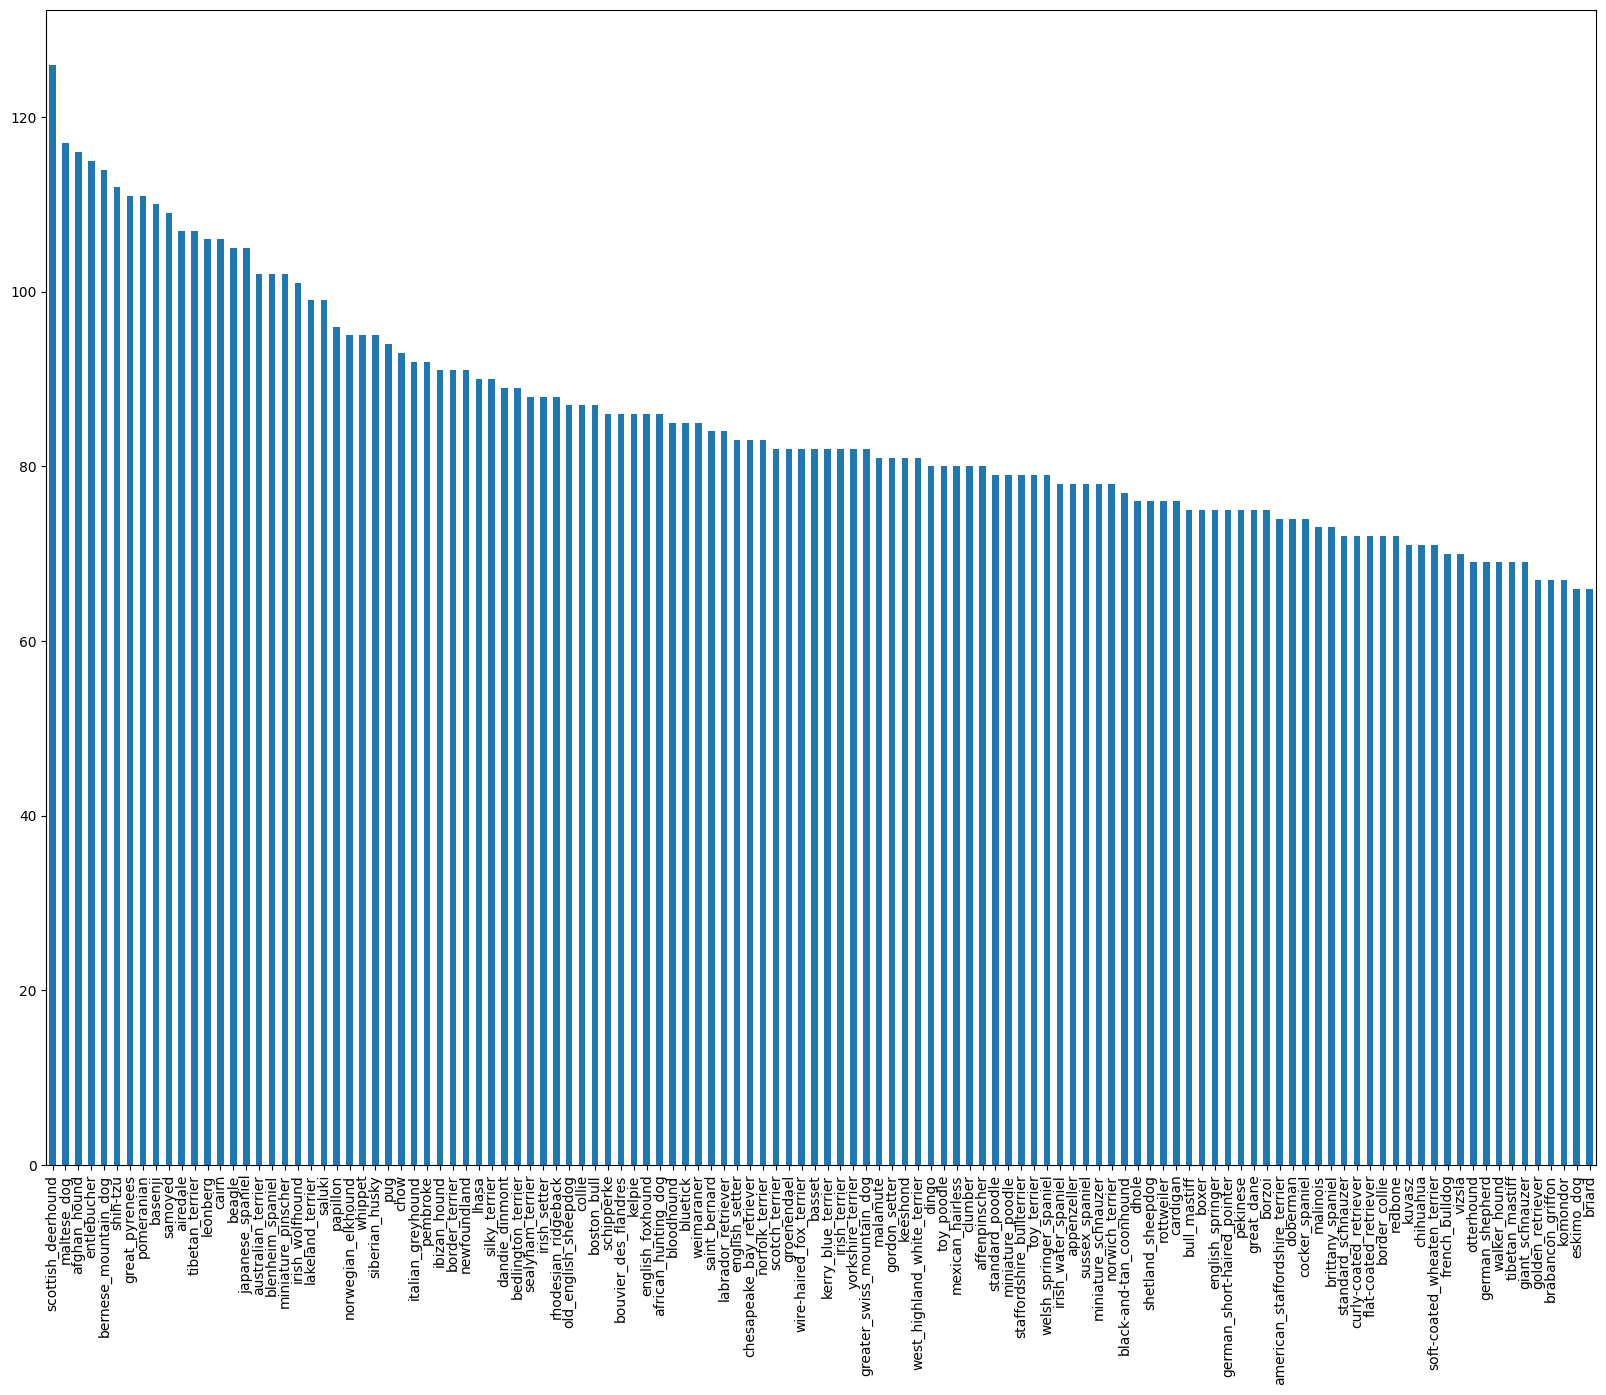

In [9]:
labels['breed'].value_counts().plot.bar(figsize = (20,15))

In [10]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

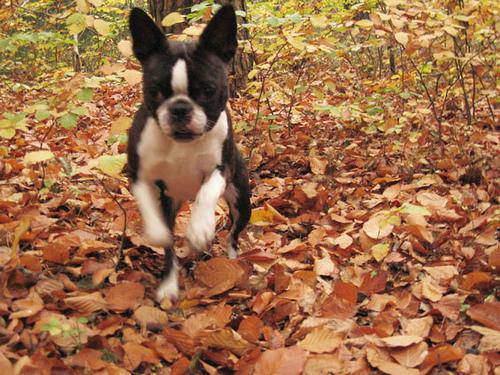

In [11]:
from IPython.display import Image
Image('drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [12]:
# Getting Images and their images
# creat pathnames from image ID's
filenames = ['drive/MyDrive/DogVision/train/' + fname +'.jpg' for fname in labels['id']]
filenames[:10]


['drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DogVision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DogVision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DogVision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DogVision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DogVision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [13]:
import os
len(os.listdir('drive/MyDrive/DogVision/train'))


10222

In [14]:
len(filenames)

10222

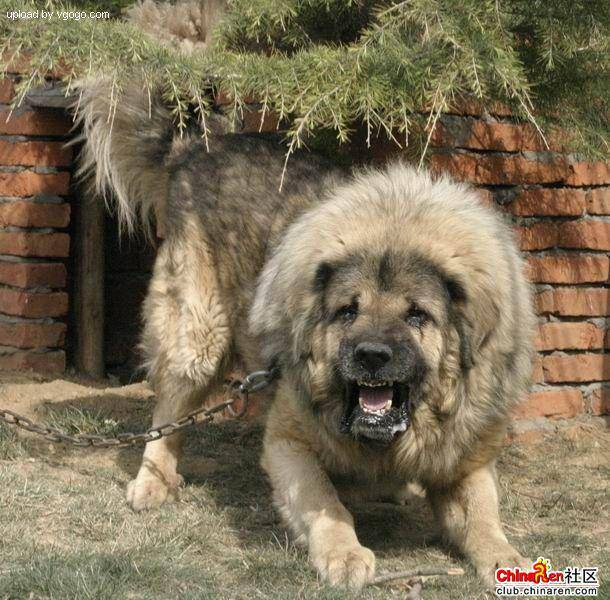

In [15]:
Image(filenames[9000])

In [16]:
labels['breed'][9000]

'tibetan_mastiff'

In [17]:
import numpy as np
# Since we've got our training image filepaths in a list, let's prepare our labels:
breeds = labels['breed']
breeds = np.array(breeds)
breeds

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
if len(breeds) == len(filenames):
  print('Matches')
else:
  print('Check data directories')

Matches


In [19]:
# Find the unique label values:
breed_labels = np.unique(breeds)
len(breed_labels)

120

In [20]:
breed_labels

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [21]:
breeds

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [22]:
print(breed_labels[119])

yorkshire_terrier


In [23]:
# ????????????? Turn every label into a boolean array: (unique_breeds = breed_labels, labels = breeds)
# Breeds is an array, breed_labels is unique breeds
boolean_labels = [breed == breed_labels for breed in breeds]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
# Turning boolean array into intergers:
print(breeds[0]) #original label
print(np.where(breed_labels == breeds[0])) #index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # Theere will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
len(breed_labels)

120

In [26]:
# Create our own validation set
# Set up x and y variables
x = filenames
y = boolean_labels

In [27]:
print(len(filenames))
len(boolean_labels)

10222


10222

In [28]:
# Set number of images to use for experimenting
num_images = 1000 #@param{type:'slider', min:1000, max:10000, step: 1000}

In [29]:
# Split data into train test sets:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x[:num_images],
                                                  y[:num_images],
                                                  test_size = 0.2,
                                                  random_state = 42)
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [30]:
x_train[:5], y_train[:2]

(['drive/MyDrive/DogVision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/DogVision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/DogVision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/DogVision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/DogVision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False

In [31]:
# Turning images into tensors: We should write a function to do a few things: 1. Take an image filepath as input; 2. Use tensorflow to read the file and save it to a variable.



3. Turn our images into Tensors
4. Normalize our image
5.Resize the image to a shape of (224,224)
6. Return the modified image

In [32]:
# Convert image to Numpy:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [33]:
# Image is between 0 and 255
image.min(), image.max()

(0, 255)

What is tensor?

A tensor is a container which can house data in N dimensions. Tensor is in tensorflow and it is already to run in a GPU

In [34]:
# Create a constent tensor from a tensor-like object

tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [35]:
# Define image size, the reasons why we choose 224 is because we want to use a machine learning model and its shaoe is 224
IMG_SIZE = 224

# Create a function for preprocessing images:
def process_image(image_path):
  """
  Takes an image file path and turns the image into a tensor
  """
  # Read in an image file, returns a tensor
  image = tf.io.read_file(image_path)
  #Turn thr jpeg image into numerical tensor with 3 color channels (red, green, blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value(224,224)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

In [36]:
#tensor = tf.io.read_file(filenames[26])

In [37]:
#tensor = tf.image.decode_jpeg(tensor, channels = 3)

In [38]:
#tensor = tf.image.convert_image_dtype(tensor, tf.float32)

In [39]:
#tf.image.resize(image, size = [IMG_SIZE,IMG_SIZE])

The batch size is a number of samples processed before the model is updated.

In [40]:
# Turning our data into batches

Why ruen our data into bathes?

Let's say you are trying to process 10000+ images in one go.
They all might not fit into memory.

So that's why we do about 32 batch size at a time.

In order to use tensorflow effectively, we need our data is in the form of tensor tuples which look like this:'(image,label)'


In [41]:
# Create a simple function to return a tuple(image, label)
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the associated label, process the image and return a typle of (image, label)
  '''
  image = process_image(image_path)
  return image, label

In [42]:
#(process_image(x[42]),tf.constant(y[42]))

 Now we've got a way to turn our data into tuples of Tensors
 in the form: '(image, label)', let's make a function to turn all of our data (x & y) into batches!

In [43]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
# Y could be none since it is our labels
def create_data_batches(x, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  '''
  Create batches of data out of image(x) amd label(y) pairs
  Shuffles the data if it's a training data, since we do not want our model remeber the data's order,
  but doesn't shuffle if it's a validation data. Also accepts test data as input(no labels).
  '''
  #If the data is a test dataset, we probably do not have labels
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths(no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE) #This transformation applies process_image to each element of this dataset, and returns a new dataset containing the transformed elements
    return data_batch
  #If the data is a valid dataset, we do not need to shuffle it
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) #Labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print('Creating training data batches...')
    # Turn filepath and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size = len(x))
    # Create (image, label) tuples, also turn the image path into a preprocessed iamge
    data = data.map(get_image_label)
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [44]:
# Creating training and validation data batches
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val, y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


In [45]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [46]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
  '''
  display a plot of 25 images and their labels from a data bbatch
  '''
  # set up the figure
  plt.figure(figsize=(16,16))
  # loop throught 25
  for i in range(25):
    # create subplots(5 rows, 5 columns)
    ax = plt.subplot(5,5,i+1)
    #display an image
    plt.imshow(images[i])
    # add images label as title
    plt.title(breed_labels[labels[i].argmax()])
    # Turn the grid line off
    plt.axis('off')



In [47]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [48]:
train_data.as_numpy_iterator()

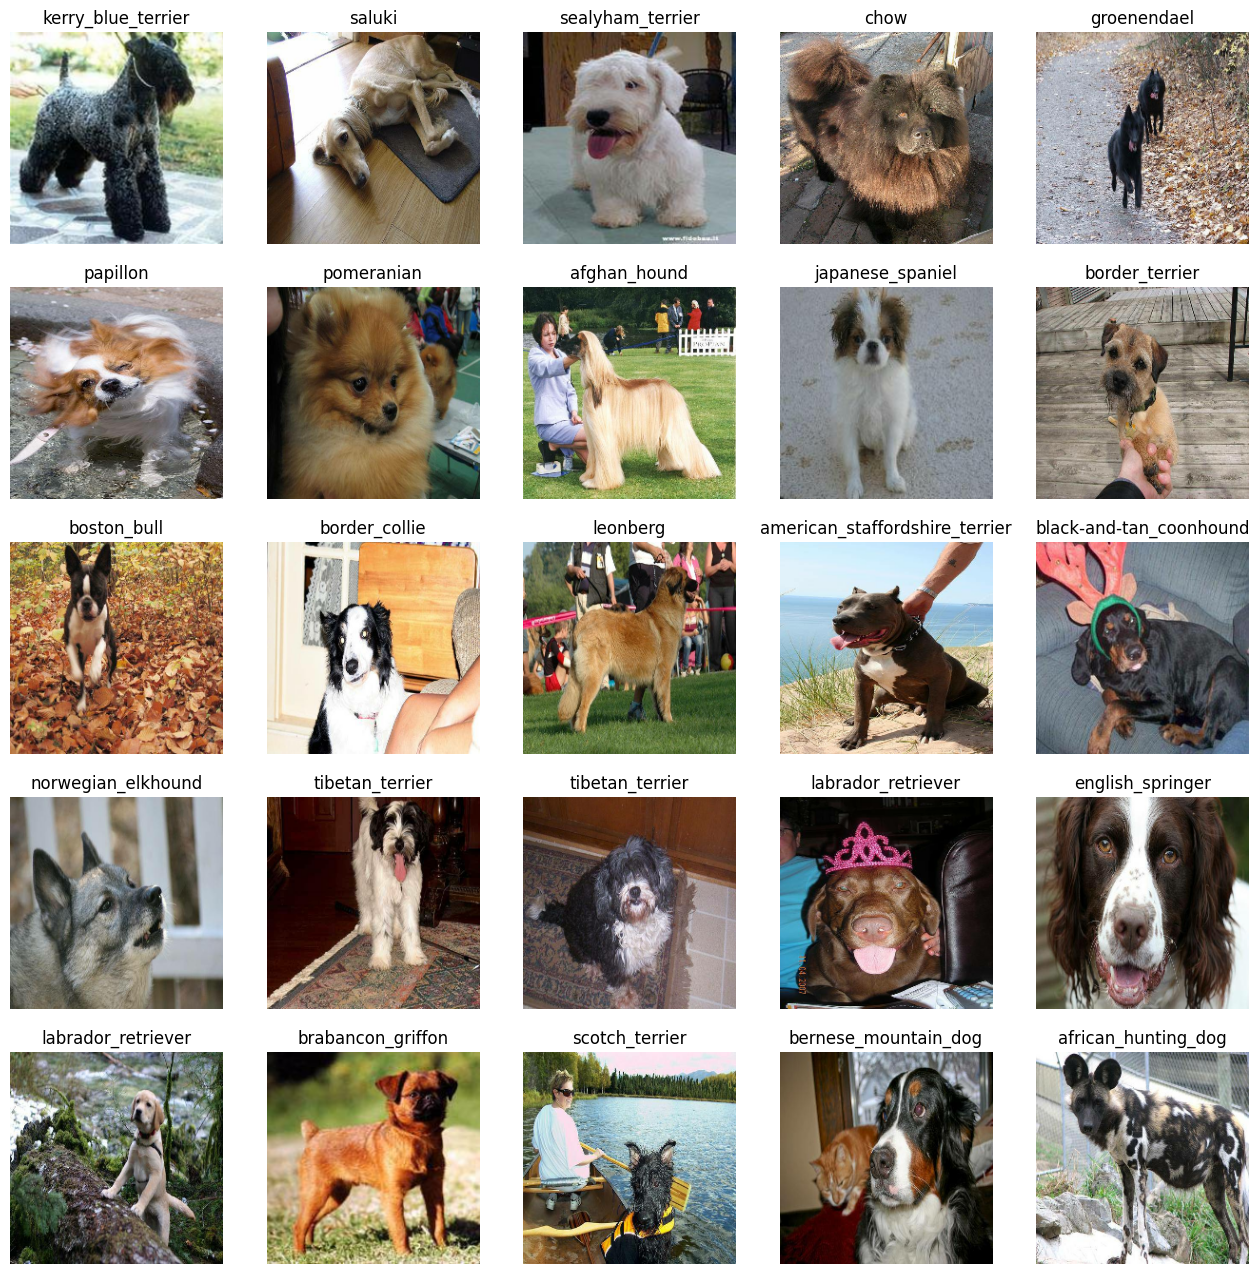

In [49]:
# New let' visualize the data in a trining batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

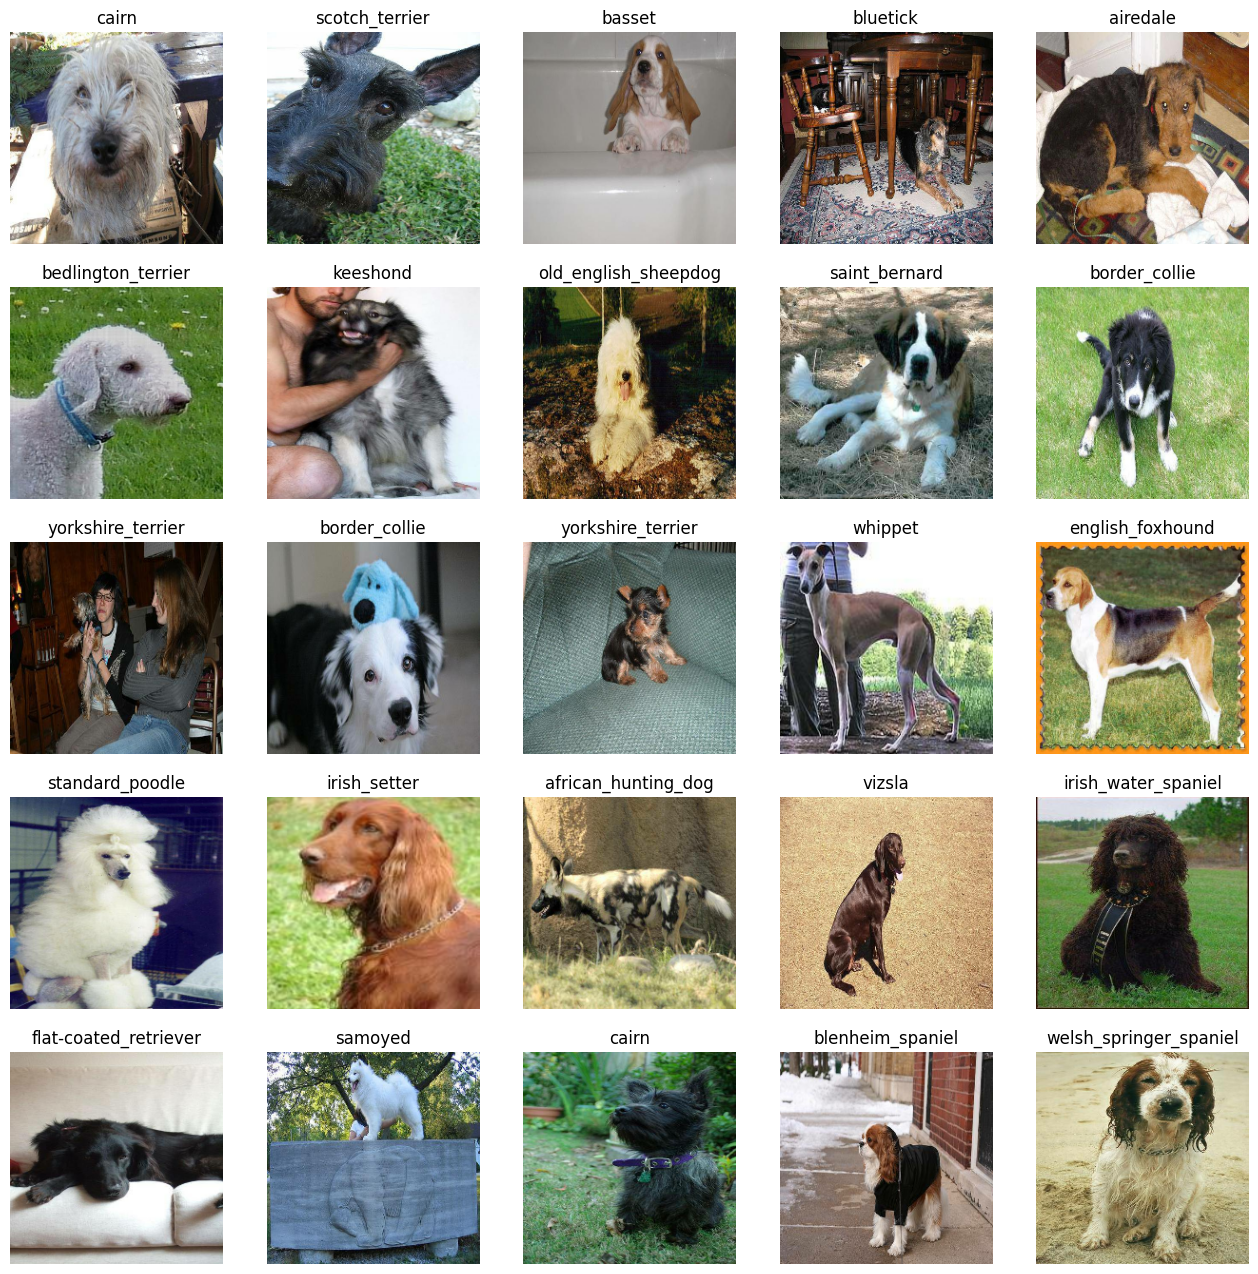

In [50]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a model

 Before building a model, there asre a few things we need to define:
 * The input shape(our images shape, in the form of tensors) to our model
 * The output shape (image labels, in the form of tensors) of our model
 * The URL of the model we want to use from tensorflow hub-https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [51]:
 # Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, color channels
# Setup output shape to the model
OUTPUT_SHAPE = len(breed_labels)
# Setup model URL from Tensorflow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

Put inputs, outputs and model togethrt into a Keras deep learning model.

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Define the layers in a Keras model in sequential function.
* Compiles the model(says it should be evaluated and improved)
* Builds the model (tells the model the imput shape it'll be getting)
* Returns the model.

All of the steps can be found here: https://www.tensorflow.org/guide/keras

#Linear stack of layers:
A stack of layers that's going to take some sort of input, find patters in that input, and then have some sort of output

# What activation?
Binary: Sigmoid

Multi-class: Softmax

# Which loss?
Binary: Binary Crossentropy

Multi-class: Categorical Crossentropy

In [52]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url = MODEL_URL):
  print('Building model with:', MODEL_URL)

  # Setup the model layers:
  model = tf.keras.Sequential([ # A stack of layers that's going to take some sort of input, find patters in that input, and theen have some sort of output
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layers)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, # Where our dense layer comes in,and we want our output in form of 120 since we have 120 dogbreeds
                            activation = 'softmax') # Layer 2 (output layer), after applying softmax, each component will be in the interval (0,1)
                                                    # And the component will add up to 1
  ])

  #Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(), # Our goal is to minimize the loss
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model



In [53]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


### Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We will create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback

To set uo a TensorBoard callback, need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's 'fit()' function.
3. Visualize our models training logs with the %tensorboard magic function(we'll do this after model training).


In [54]:
# Load TensorBoard Notebook Extension
%load_ext tensorboard


In [55]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join('drive/MyDrive/DogVision/Logs',
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)


### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation evaluation metrics stops improving.

In [56]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience=3)

## Training a model(on subset of data)

Our first model is going to train on 1000 images, to make sure everything is working.

Number of epoches is how many passes of the data we'd like our model to do, so  the number of epochs is how many passes of the data we'd like our model to do.

100 epoches means we are giving our model up to 100 chances to go through the training dataset and figure our the patterns.



In [80]:
NUM_EPOCHES = 100 #@param {type:'slider', min:10,max:100}

In [58]:
# Check still using GPU
print('GPU', 'avaliable(yes)' if tf.config.list_physical_devices('GPU') else 'not available :(')

GPU avaliable(yes)


Let's create a function which train a model

* Create a model using 'create_model()'
* Setup a TensorBoard callback using 'create_tensorboard_callback()'
* Call the fit() function on out model passing it the training data, val data, number of epochs to train for(NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [59]:
# BUild a functionn to train and return a trained model
def train_model():
  '''
  trains a given model and returns the trained version
  '''
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard= create_tensorboard_callback()

  # Fit the model to the data passing it the callback we created
  model.fit(x= train_data,
            epochs = NUM_EPOCHES,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])

  return model

In [60]:
model = train_model()
# Batch size = 32, steps = data size / batch size

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 237s 9s/step - loss: 4.7721 - accuracy: 0.0925 - val_loss: 3.5993 - val_accuracy: 0.2000
Epoch 2/100
25/25 [==============================] - 3s 131ms/step - loss: 1.7506 - accuracy: 0.6425 - val_loss: 2.1965 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 3s 103ms/step - loss: 0.6024 - accuracy: 0.9262 - val_loss: 1.6805 - val_accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 3s 131ms/step - loss: 0.2662 - accuracy: 0.9887 - val_loss: 1.4858 - val_accuracy: 0.6650
Epoch 5/100
25/25 [==============================] - 3s 111ms/step - loss: 0.1545 - accuracy: 0.9975 - val_loss: 1.4145 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 3s 104ms/step - loss: 0.1044 - accuracy: 0.9987 - val_loss: 1.3712 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================]

Making andd evaluating predictions using a trained model

In [61]:
# Make predictions on the validation data ( not used to train on)
predictions = model.predict(val_data,verbose =1)
predictions

7/7 [==============================] - 3s 80ms/step


array([[7.72874977e-04, 1.24827318e-04, 2.80800683e-04, ...,
        1.97866160e-04, 2.72214063e-04, 2.63261585e-03],
       [1.10966142e-03, 1.01444079e-03, 3.81288677e-03, ...,
        8.53220641e-04, 2.43559852e-03, 8.93123506e-04],
       [4.45083879e-06, 8.61531225e-05, 2.30305304e-05, ...,
        1.19278011e-04, 6.13481971e-05, 7.70454935e-04],
       ...,
       [1.25410688e-05, 8.84410256e-05, 1.03199825e-04, ...,
        6.17818114e-06, 5.37479122e-04, 1.20222394e-03],
       [4.44095023e-03, 4.14896262e-04, 1.75835463e-04, ...,
        1.32828107e-04, 2.88873543e-05, 1.18118534e-02],
       [6.70846086e-04, 1.75836016e-04, 1.10414217e-03, ...,
        1.71647277e-02, 4.51911677e-04, 7.76719971e-05]], dtype=float32)

**Note** Prediction probabilities are also known as confidence levels

In [62]:
predictions.shape

(200, 120)

In [63]:
# Turn probabilities into their respective label (easier to undestand)
def get_pred_label(prediction_probabilities):
  '''
  Tyrns an array of prediction probabilities into a label
  '''
  return breed_labels[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

Unbatchify our validation data to make predictions on the validation images and then comapre those predictions to the validation labels

In [64]:
# Create a function to unbath
def unbatchify(data):
  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(breed_labels[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [65]:
def plot_pred_conf(prediction_probabilities, labels, n= 1):
  '''
  plus the top 10 highest predcition confidence along with the truth label for sample n
  '''
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 labels
  top_10_pred_labels = breed_labels[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = 'grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = 'vertical')

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass


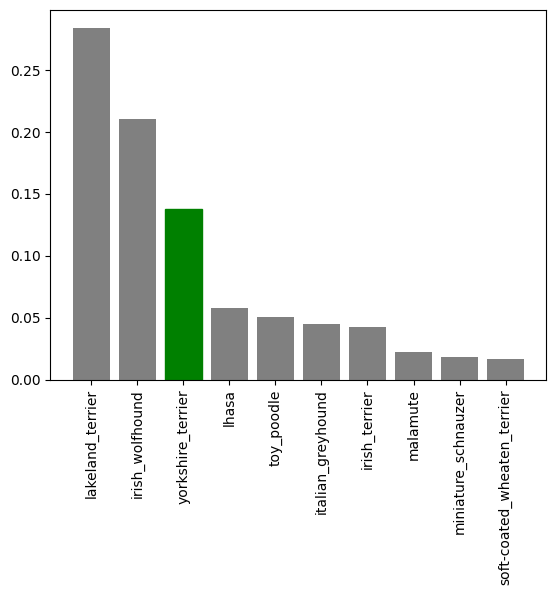

In [66]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n = 10)

In [67]:
breed_labels

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [68]:
# let's chech out a few predictons and their different values


How to create a confusion matrix with our models predictions and true labels?

## Saving and reloading a trained model


In [69]:
# function to save a model
def save_model(model,suffix= None):
  '''
  Saves a given model in a model directory and appens a suffix(string)
  '''
  # Create a model directory pathname with current time
  modeldir = os.path.join('drive/MyDrive/DogVision/Models',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))

  model_path = modeldir + '-' +suffix + '.h5' # save format of model
  print(f'saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [70]:
# build a function to load a trained model
def load_model(model_path):
  '''
  Loads a saved model from a specified path
  '''
  print(f'Loafing saved model from:{model_path}')
  model = tf.keras.models.load_model(model_path,
                                      custom_objects={'KerasLayer':hub.KerasLayer})
  return model

In [71]:
save_model(model, suffix= "1000-images-MobilentV2-Adam")

saving model to: drive/MyDrive/DogVision/Models/20231002-03331696217584-1000-images-MobilentV2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/DogVision/Models/20231002-03331696217584-1000-images-MobilentV2-Adam.h5'

In [72]:
loaded_1000_image_model = load_model('drive/MyDrive/DogVision/Models/20230922-01411695346907-1000-images-MobilentV2-Adam.h5')

Loafing saved model from:drive/MyDrive/DogVision/Models/20230922-01411695346907-1000-images-MobilentV2-Adam.h5


In [73]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 119ms/step - loss: 1.2795 - accuracy: 0.6750


[1.2795137166976929, 0.675000011920929]

In [74]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 86ms/step - loss: 1.2499 - accuracy: 0.6750


[1.249927043914795, 0.675000011920929]

In [75]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Training a big dog model on the full data

In [77]:
# Create a data batch with the full data set
full_data = create_data_batches(x,y)

Creating training data batches...


In [78]:
# Create a model for full model
full_model = create_model()
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                                             patience = 3)

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [81]:
# Fit the full model to the full data
full_model.fit(x = full_data,
               epochs = NUM_EPOCHES,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 40s 111ms/step - loss: 1.3394 - accuracy: 0.6681
Epoch 2/100
320/320 [==============================] - 29s 91ms/step - loss: 0.3954 - accuracy: 0.8831
Epoch 3/100
320/320 [==============================] - 43s 133ms/step - loss: 0.2354 - accuracy: 0.9362
Epoch 4/100
320/320 [==============================] - 29s 92ms/step - loss: 0.1534 - accuracy: 0.9632
Epoch 5/100
320/320 [==============================] - 29s 91ms/step - loss: 0.1067 - accuracy: 0.9781
Epoch 6/100
320/320 [==============================] - 38s 119ms/step - loss: 0.0756 - accuracy: 0.9878
Epoch 7/100
320/320 [==============================] - 37s 115ms/step - loss: 0.0588 - accuracy: 0.9914
Epoch 8/100
320/320 [==============================] - 34s 106ms/step - loss: 0.0455 - accuracy: 0.9945
Epoch 9/100
320/320 [==============================] - 30s 94ms/step - loss: 0.0387 - accuracy: 0.9956
Epoch 10/100
320/320 [==============================] - 29s 91ms/ste

In [83]:
save_model(full_model,suffix='full-image-set-mobilenetv2.Adam')

saving model to: drive/MyDrive/DogVision/Models/20231002-03551696218939-full-image-set-mobilenetv2.Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/DogVision/Models/20231002-03551696218939-full-image-set-mobilenetv2.Adam.h5'

In [90]:
# Load in full model
load_full_model = load_model('drive/MyDrive/DogVision/Models/20231002-03331696217584-1000-images-MobilentV2-Adam.h5')

Loafing saved model from:drive/MyDrive/DogVision/Models/20231002-03331696217584-1000-images-MobilentV2-Adam.h5


# Making prediction on the test dataset

In [97]:
# Load test image of filenames
test_path = 'drive/MyDrive/DogVision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/DogVision/test/e137b0cd96051765c349377725c4696d.jpg',
 'drive/MyDrive/DogVision/test/dd026c42cfd91ea64b1fe5db04a18863.jpg',
 'drive/MyDrive/DogVision/test/e751e319cfdc9912ae2e5da2a9b053e0.jpg',
 'drive/MyDrive/DogVision/test/e15513ca7ebb4730731f34c25e906502.jpg',
 'drive/MyDrive/DogVision/test/e60f6620bf8751538db9006d425f1b45.jpg',
 'drive/MyDrive/DogVision/test/e2628b6bde028b5eb593616128728907.jpg',
 'drive/MyDrive/DogVision/test/e6b1859592468c8ffc1a73f87b201ba7.jpg',
 'drive/MyDrive/DogVision/test/e5e51d0dfc3ccdb74de51933b2671742.jpg',
 'drive/MyDrive/DogVision/test/deec3d206b0f5c927c86ed1782990961.jpg',
 'drive/MyDrive/DogVision/test/e406358fe35be30ac65f11936c2a066e.jpg']

In [98]:
len(test_filenames)

10357

In [99]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...


In [100]:
# Make predictions on test data batch using the loaded full model
test_predictions = load_full_model.predict(test_data,
                                           verbose = 1)

324/324 [==============================] - 4082s 13s/step


In [ ]:
# Save predictions (Numpy Array) to csv file(for access later)
np.savetxt('drive/MyDrive/DogVision/preds_array.csv',test_predictions, delimiter = ',')

In [ ]:
# Load predictions (Numpy array) from csv file
test_predictions = np.loadtxt('drive/MyDrive/DogVision/preds_array.csv', delimiter = ',')